# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
## The data represents 3 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from tqdm import tqdm
from time import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
def count_null_values(df):
  """Counts the number of null values in each column of a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.
  """

  for col in df.columns:
    null_count = df[col].isnull().sum()
    print(col, null_count)


count_null_values(df)

age 0
job 0
marital 0
education 0
default 0
housing 0
loan 0
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
def print_unique_values_for_object_columns(df):
  """Prints the unique values for each column of type object in a Pandas DataFrame.

  Args:
    df: A Pandas DataFrame.
  """

  for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].unique())

print_unique_values_for_object_columns(df)

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
y ['no' 'yes']


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

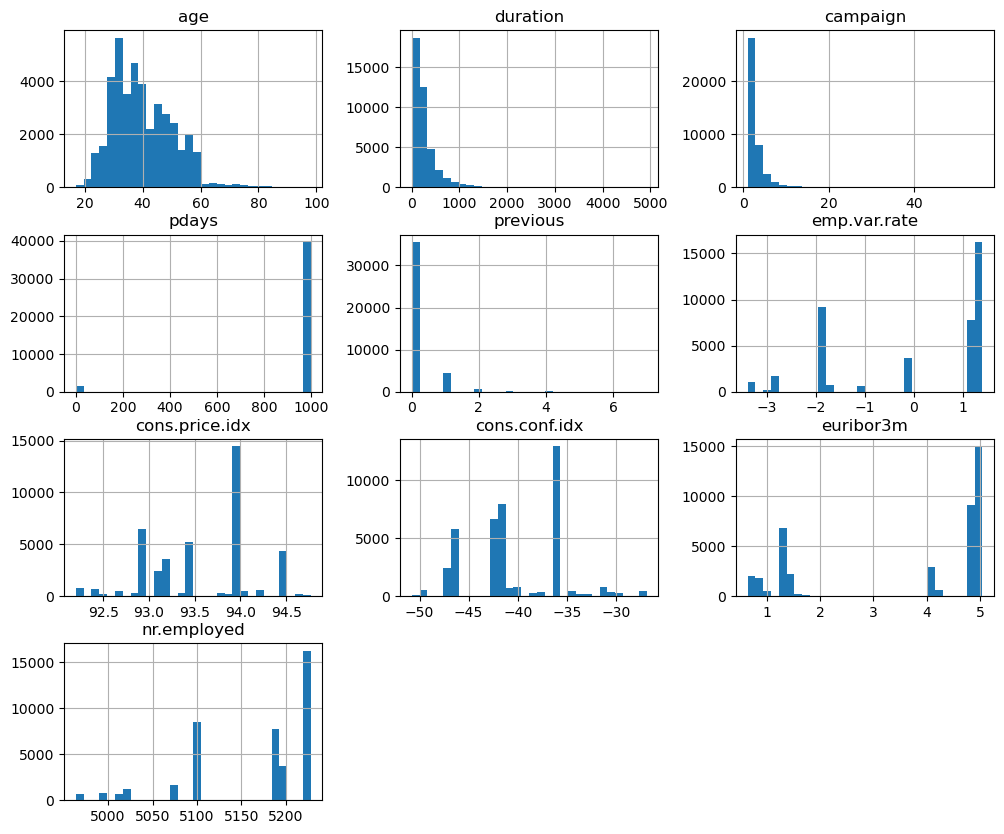

In [8]:
df.hist(bins=30, figsize=(12, 10))

Column 11, duration, should be discarded if the intention is to have a realistic predictive model. This is because the duration of the last contact is known after the call is performed, and therefore cannot be used to predict whether or not the customer will subscribe to a bank deposit.

 The best approach is to drop the collumn, as it can never be known before a call.

 Columns Job and Education will be One Hot Encoded

 Columns Marital, Default, Housing, Loan, Contact, Month, Day_of_week, Poutcome, and Y will be label encoded.

 All other columns remain unchanged.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

 The business objective is to utilize the dataset of phone based sales calls from a Portugese Banking Institution to create a series of models designed to predict a sucessful outcome on a sales call in subscribing customers to deposits in savings.  

 The models will then be examined, optimized, and compared with AB testing to determine which is the most effective.  

 The findings will summarize the results of this model.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:

# Drop the `duration` column
df = df.drop('duration', axis=1)


In [10]:
def encode_columns(df):
    
    df = pd.get_dummies(df, columns=['job','education'])
    for col in ['marital', 'housing', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y' ]:
        df[col] = df[col].astype('category').cat.codes
    return df



encoded_df = encode_columns(df)


In [11]:
encoded_df.head()

,age,marital,default,housing,loan,contact,month,day_of_week,campaign,pdays,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,1,0,0,0,1,6,1,1,999,...,False,False,True,False,False,False,False,False,False,False
1,57,1,1,0,0,1,6,1,1,999,...,False,False,False,False,False,True,False,False,False,False
2,37,1,0,2,0,1,6,1,1,999,...,False,False,False,False,False,True,False,False,False,False
3,40,1,0,0,0,1,6,1,1,999,...,False,False,False,True,False,False,False,False,False,False
4,56,1,0,0,2,1,6,1,1,999,...,False,False,False,False,False,True,False,False,False,False


In [12]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41188 non-null  int8   
 2   default                        41188 non-null  int8   
 3   housing                        41188 non-null  int8   
 4   loan                           41188 non-null  int8   
 5   contact                        41188 non-null  int8   
 6   month                          41188 non-null  int8   
 7   day_of_week                    41188 non-null  int8   
 8   campaign                       41188 non-null  int64  
 9   pdays                          41188 non-null  int64  
 10  previous                       41188 non-null  int64  
 11  poutcome                       41188 non-null  int8   
 12  emp.var.rate                   41188 non-null 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
# Split the encoded DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('y', axis=1), encoded_df['y'], test_size=0.25, random_state=42)

# Print the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(30891, 37)
(10297, 37)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
# Create a ZeroRule classifier
zero_rule_classifier = DummyClassifier(strategy='most_frequent')

# Fit the ZeroRule classifier to the training data
zero_rule_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = zero_rule_classifier.predict(X_train)

# Calculate the accuracy of the ZeroRule classifier on the training data
accuracy_train = zero_rule_classifier.score(X_train, y_train)

# Make predictions on the testing data
y_pred_test = zero_rule_classifier.predict(X_test)

# Calculate the accuracy of the ZeroRule classifier on the testing data
accuracy_test = zero_rule_classifier.score(X_test, y_test)

# Print the accuracy of the ZeroRule classifier on the training and testing data
print('Accuracy on training data:', accuracy_train)
print('Accuracy on testing data:', accuracy_test)

Accuracy on training data: 0.887119225664433
Accuracy on testing data: 0.8880256385354958


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from time import time

# Create an instance of LogisticRegression
logistic_regression = LogisticRegression(solver='liblinear', random_state=78)

# Record the start time
start_time = time()

# Fit the model to the training data
logistic_regression.fit(X_train, y_train)

# Record the training time
log_train_time = time() - start_time

# Make predictions on the training data
log_pred_train = logistic_regression.predict(X_train)

# Calculate the accuracy of the predictions on the training data
log_accuracy_train = accuracy_score(y_train, log_pred_train)

# Make predictions on the test data
log_pred_test = logistic_regression.predict(X_test)

# Calculate the accuracy of the predictions on the test data
log_accuracy_test = accuracy_score(y_test, log_pred_test)

# Print the accuracies and training time
print(f"Logistic Regression Model accuracy on training data: {log_accuracy_train}")
print(f"Logistic Regression Model accuracy on testing data: {log_accuracy_test}")
print(f"Logistic Regression Model train time: {log_train_time}")



Logistic Regression Model accuracy on training data: 0.8996795183063028
Logistic Regression Model accuracy on testing data: 0.8991939399825192
Logistic Regression Model train time: 0.08621048927307129


### Problem 9: Score the Model

What is the accuracy of your model?

 Starting accuracy of 89.9% for both Test and Training datasets, almost instantaneous train time of 0.079 seconds.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score # import f1_score function
from time import time
# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
# Record the start time
start_time = time()
# Fit the model to the training data
knn.fit(X_train.values, y_train.values)
# Record the training time
knn_train_time = time() - start_time
# Make predictions on the training data
knn_pred_train = knn.predict(X_train.values)
# Calculate the accuracy of the predictions on the training data
knn_accuracy_train = accuracy_score(y_train.values, knn_pred_train)
# Calculate the f1 score of the predictions on the training data # add this line
knn_f1_train = f1_score(y_train.values, knn_pred_train) # add this line
# Make predictions on the test data
knn_pred_test = knn.predict(X_test.values)
# Calculate the accuracy of the predictions on the test data
knn_accuracy_test = accuracy_score(y_test.values, knn_pred_test)
# Calculate the f1 score of the predictions on the test data # add this line
knn_f1_test = f1_score(y_test.values, knn_pred_test) # add this line
# Print the accuracies, f1 scores and training time # modify this line
print(f"K Nearest Neighbor Model accuracy on training data: {knn_accuracy_train}")
print(f"K Nearest Neighbor Model f1 score on training data: {knn_f1_train}") # add this line
print(f"K Nearest Neighbor Model accuracy on testing data: {knn_accuracy_test}")
print(f"K Nearest Neighbor Model f1 score on testing data: {knn_f1_test}") # add this line
print(f"K Nearest Neighbor Model train time: {knn_train_time}")


K Nearest Neighbor Model accuracy on training data: 0.7570422535211268
K Nearest Neighbor Model f1 score on training data: 0.823529411764706
K Nearest Neighbor Model accuracy on testing data: 0.6464379947229552
K Nearest Neighbor Model f1 score on testing data: 0.73828125
K Nearest Neighbor Model train time: 0.009419918060302734


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from time import time

# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Record the start time
start_time = time()

# Fit the model to the training data
dtc.fit(X_train.values, y_train.values)

# Record the training time
dtc_train_time = time() - start_time

# Make predictions on the training data
dtc_pred_train = dtc.predict(X_train.values)

# Calculate the accuracy of the predictions on the training data
dtc_accuracy_train = accuracy_score(y_train.values, dtc_pred_train)

# Make predictions on the test data
dtc_pred_test = dtc.predict(X_test.values)

# Calculate the accuracy of the predictions on the test data
dtc_accuracy_test = accuracy_score(y_test.values, dtc_pred_test)

# Print the accuracies and training time
print(f"Decision Tree Model accuracy on training data: {dtc_accuracy_train}")
print(f"Decision Tree Model accuracy on testing data: {dtc_accuracy_test}")
print(f"Decision Tree Model train time: {dtc_train_time}")


Decision Tree Model accuracy on training data: 0.9954355637564339
Decision Tree Model accuracy on testing data: 0.8408274254637274
Decision Tree Model train time: 0.18620681762695312


In [18]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from time import time

# Create an instance of svm.SVC
svc = svm.SVC()

# Record the start time
start_time = time()

# Fit the model to the training data
svc.fit(X_train.values, y_train.values)

# Record the training time
svc_train_time = time() - start_time

# Make predictions on the training data
svc_pred_train = svc.predict(X_train.values)

# Calculate the accuracy of the predictions on the training data
svc_accuracy_train = accuracy_score(y_train.values, svc_pred_train)

# Make predictions on the test data
svc_pred_test = svc.predict(X_test.values)

# Calculate the accuracy of the predictions on the test data
svc_accuracy_test = accuracy_score(y_test.values, svc_pred_test)

# Print the accuracies and training time
print(f"Support Vector Machine Model accuracy on training data: {svc_accuracy_train}")
print(f"Support Vector Machine Model accuracy on testing data: {svc_accuracy_test}")
print(f"Support Vector Machine Model train time: {svc_train_time}")


Support Vector Machine Model accuracy on training data: 0.8978343206759251
Support Vector Machine Model accuracy on testing data: 0.8965718170340876
Support Vector Machine Model train time: 5.937437057495117


In [19]:
# Create a dictionary with the model performance metrics
data = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train Accuracy': [knn_accuracy_train, dtc_accuracy_train, log_accuracy_train, svc_accuracy_train],
    'Test Accuracy': [knn_accuracy_test, dtc_accuracy_test, log_accuracy_test, svc_accuracy_test]
}

# Convert the dictionary to a DataFrame
model_comparisons = pd.DataFrame(data)

# Print the DataFrame
print(model_comparisons)


                      Model  Train Time  Train Accuracy  Test Accuracy
0        K Nearest Neighbor    0.040859        0.912823       0.886375
1  Decision Tree Classifier    0.186207        0.995436       0.840827
2       Logistic Regression    0.086210        0.899680       0.899194
3    Support Vector Machine    5.937437        0.897834       0.896572


 Logistic Regression is the best performing model in Test Accuracy, its results are consistent in Train Accuracy, and it executes in a fraction of a second.  It beats the Zero Rule Classifier.

 K Nearest Neighbor is slightly faster, but also slightly less accurate. It comes in just short of the Zero Rule Classifier.

 Support Vector Machine is the runner up, just 0.034% behind Logistic Regression in terms of accuracy, however it takes substantially longer to train at nearly 6 seconds.  It beats the Zero Rule Classifier.

 Decision Tree Classifier is slightly slower, but still executes in under 0.25 a second.  However, it shows signs of overfitting with its 99.5% accuracy in Train but significantly lower 83.9% accuracy in Test, the worst perfomer of the 4.

 All models train quickly enough that they are acceptable for use in this scenario.  It will be a question of optimization.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [36]:
# Import randomized search cv from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters for randomized search
knn_params = {'n_neighbors': (1,100)}
dtc_params = {'max_depth': (None, 20)}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_params = {'C': (0.001, 100), 'gamma': (0.001,1)}

# Perform randomized search for each model with f1-score as the scoring metric
knn_rs = RandomizedSearchCV(knn, knn_params, scoring='f1', n_jobs=-1, n_iter=10)
dtc_rs = RandomizedSearchCV(dtc, dtc_params, scoring='f1', n_jobs=-1, n_iter=10)
log_rs = RandomizedSearchCV(logistic_regression, log_params, scoring='f1', n_jobs=-1, n_iter=10)
svc_rs = RandomizedSearchCV(svc, svc_params, scoring='f1', n_iter=10)

# Fit the models to the training data and record the training time
start_time = time()
knn_rs.fit(X_train.values, y_train.values)
knn_train_time = time() - start_time

start_time = time()
dtc_rs.fit(X_train.values, y_train.values)
dtc_train_time = time() - start_time

start_time = time()
log_rs.fit(X_train.values, y_train.values)
log_train_time = time() - start_time

start_time = time()
svc_rs.fit(X_train.values, y_train.values)
svc_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train F1-Score': [knn_rs.score(X_train.values, y_train.values), dtc_rs.score(X_train.values, y_train.values), log_rs.score(X_train.values, y_train.values), svc_rs.score(X_train.values, y_train.values)],
    'Test F1-Score': [knn_rs.score(X_test.values, y_test.values), dtc_rs.score(X_test.values, y_test.values), log_rs.score(X_test.values, y_test.values), svc_rs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)


                      Model  Train Time  Train F1-Score  Test F1-Score
0        K Nearest Neighbor    0.226777        0.787621       0.787879
1  Decision Tree Classifier    0.131570        0.998615       0.676349
2       Logistic Regression    0.174695        0.797801       0.787120
3    Support Vector Machine    2.609015        0.777838       0.783307


Model: K Nearest Neighbor
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.28      0.39       135
           1       0.70      0.91      0.79       244

    accuracy                           0.69       379
   macro avg       0.66      0.60      0.59       379
weighted avg       0.67      0.69      0.65       379



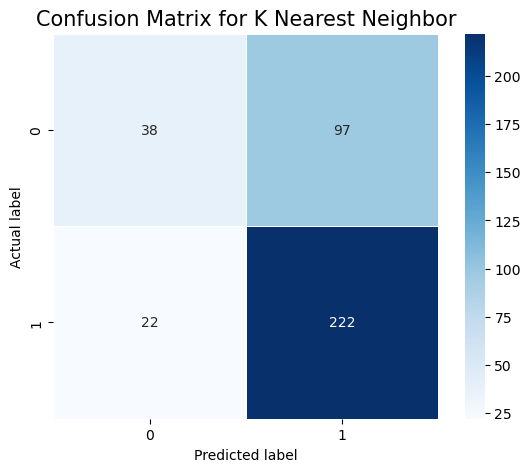

Model: Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.29      0.39       135
           1       0.69      0.89      0.78       244

    accuracy                           0.68       379
   macro avg       0.64      0.59      0.58       379
weighted avg       0.66      0.68      0.64       379



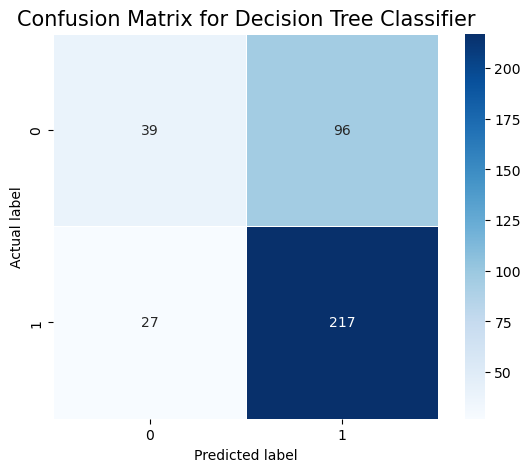

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       135
           1       0.70      0.90      0.79       244

    accuracy                           0.69       379
   macro avg       0.66      0.60      0.59       379
weighted avg       0.67      0.69      0.65       379



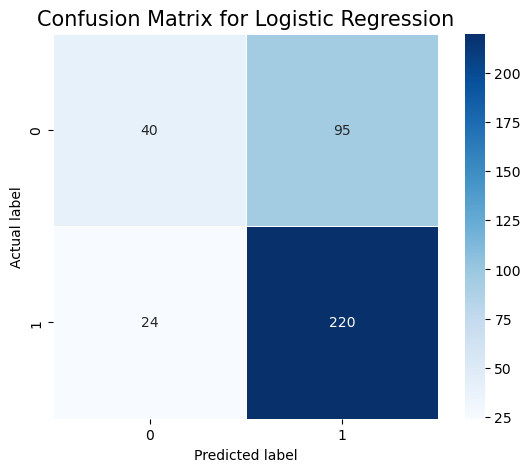

Model: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.29      0.40       135
           1       0.70      0.91      0.79       244

    accuracy                           0.69       379
   macro avg       0.67      0.60      0.59       379
weighted avg       0.68      0.69      0.65       379



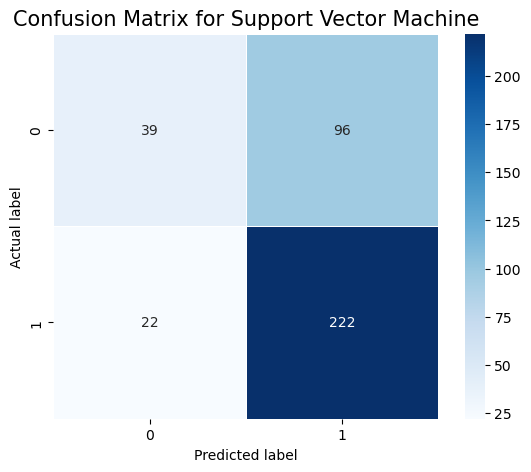

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = [knn_gs, dtc_gs, log_gs, svc_gs]
model_names = ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine']

for i, model in enumerate(models):
    print(f"Model: {model_names[i]}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test.values, model.predict(X_test.values)))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test.values, model.predict(X_test.values))
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_names[i]}', size = 15)
    plt.show()


# Support Vector Machine & KNN are the top performer with 79% f1 scores - these remained the best models throughout my experiments.

# 79% accuracy is good enough to make for a strong sales tool


In [39]:

# Define the hyperparameters for grid search
knn_params = {'n_neighbors': [3, 5, 7, 9]}
dtc_params = {'max_depth': [None, 2, 4, 6, 8, 10]}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search for each model
knn_gs = GridSearchCV(knn, knn_params, n_jobs=-1)
dtc_gs = GridSearchCV(dtc, dtc_params, n_jobs=-1)
log_gs = GridSearchCV(logistic_regression, log_params, n_jobs=-1)

# Fit the models to the training data and record the training time
start_time = time()
knn_gs.fit(X_train_under.values, y_train_under.values)
knn_train_time = time() - start_time

start_time = time()
dtc_gs.fit(X_train_under.values, y_train_under.values)
dtc_train_time = time() - start_time

start_time = time()
log_gs.fit(X_train_under.values, y_train_under.values)
log_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time],
    'Train Accuracy': [knn_gs.score(X_train_under.values, y_train_under.values), dtc_gs.score(X_train_under.values, y_train_under.values), log_gs.score(X_train_under.values, y_train_under.values)],
    'Test Accuracy': [knn_gs.score(X_test.values, y_test.values), dtc_gs.score(X_test.values, y_test.values), log_gs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)


                      Model  Train Time  Train Accuracy  Test Accuracy
0        K Nearest Neighbor    0.363798        0.770040       0.771425
1  Decision Tree Classifier    0.271885        0.752092       0.854091
2       Logistic Regression    0.279771        0.738462       0.812454


Decided to experiment with undersampling and oversampling to see if it would improve performance

In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Define your features and target variable
X = encoded_df.drop('y', axis=1)  # replace 'target_column' with the name of your target column
y = encoded_df['y']  # replace 'target_column' with the name of your target column

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the oversampling method
oversample = RandomOverSampler(sampling_strategy='minority')

# Apply the transform to the training data
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

# Print the new class distribution
print(Counter(y_train_over))


Counter({0: 29245, 1: 29245})


In [48]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# Define the hyperparameters for grid search
knn_params = {'n_neighbors': [3, 5, 7, 9]}
dtc_params = {'max_depth': [None, 2, 4, 6, 8, 10]}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# Perform grid search for each model
knn_gs = GridSearchCV(knn, knn_params, n_jobs=-1)
dtc_gs = GridSearchCV(dtc, dtc_params, n_jobs=-1)
log_gs = GridSearchCV(logistic_regression, log_params, n_jobs=-1)
# Fit the models to the training data and record the training time
start_time = time()
knn_gs.fit(X_train_over.values, y_train_over.values)
knn_train_time = time() - start_time

start_time = time()
dtc_gs.fit(X_train_over.values, y_train_over.values)
dtc_train_time = time() - start_time

start_time = time()
log_gs.fit(X_train_over.values, y_train_over.values)
log_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time],
    'Train Accuracy': [knn_gs.score(X_train_over.values, y_train_over.values), dtc_gs.score(X_train_over.values, y_train_over.values), log_gs.score(X_train_over.values, y_train_over.values)],
    'Test Accuracy': [knn_gs.score(X_test.values, y_test.values), dtc_gs.score(X_test.values, y_test.values), log_gs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)


                      Model  Train Time  Train Accuracy  Test Accuracy
0        K Nearest Neighbor    5.022116        0.958386       0.814154
1  Decision Tree Classifier    2.212163        0.996923       0.847293
2       Logistic Regression    4.116411        0.738468       0.817796


Model: K Nearest Neighbor
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7303
           1       0.29      0.44      0.35       935

    accuracy                           0.81      8238
   macro avg       0.61      0.65      0.62      8238
weighted avg       0.85      0.81      0.83      8238



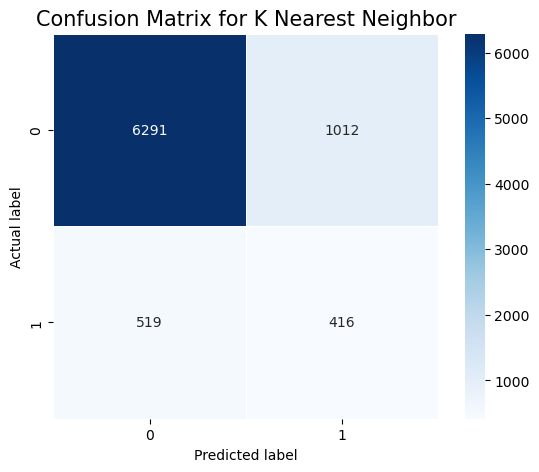

Model: Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7303
           1       0.33      0.33      0.33       935

    accuracy                           0.85      8238
   macro avg       0.62      0.62      0.62      8238
weighted avg       0.85      0.85      0.85      8238



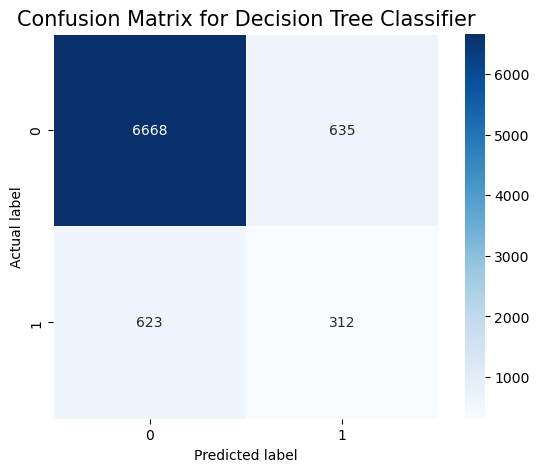

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7303
           1       0.33      0.61      0.43       935

    accuracy                           0.82      8238
   macro avg       0.64      0.73      0.66      8238
weighted avg       0.88      0.82      0.84      8238



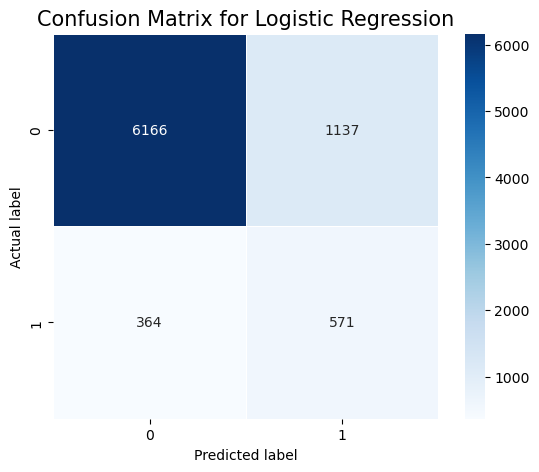

In [49]:
models = [knn_gs, dtc_gs, log_gs]
model_names = ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression']

for i, model in enumerate(models):
    print(f"Model: {model_names[i]}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test.values, model.predict(X_test.values)))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test.values, model.predict(X_test.values))
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_names[i]}', size = 15)
    plt.show()

Both undersampling and oversampling resulted in significantly worse performance for the models.  

Decided to create a new dataframe that includes only calls where they made contact to see if that makes a difference

In [20]:
new_encoded_df = encoded_df[encoded_df['pdays'] != 999]


In [21]:
# Split the encoded DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_encoded_df.drop('y', axis=1), new_encoded_df['y'], test_size=0.25, random_state=42)

# Print the shape of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(1136, 37)
(379, 37)


In [61]:
# Define the hyperparameters for grid search
knn_params = {'n_neighbors': [3, 5, 7, 9]}
dtc_params = {'max_depth': [None, 2, 4, 6, 8, 10]}
log_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

# Perform grid search for each model
knn_gs = GridSearchCV(knn, knn_params, n_jobs=-1)
dtc_gs = GridSearchCV(dtc, dtc_params, n_jobs=-1)
log_gs = GridSearchCV(logistic_regression, log_params, n_jobs=-1)
svc_gs = GridSearchCV(svc, svc_params, n_jobs=-1)

# Fit the models to the training data and record the training time
start_time = time()
knn_gs.fit(X_train.values, y_train.values)
knn_train_time = time() - start_time

start_time = time()
dtc_gs.fit(X_train.values, y_train.values)
dtc_train_time = time() - start_time

start_time = time()
log_gs.fit(X_train.values, y_train.values)
log_train_time = time() - start_time

start_time = time()
svc_gs.fit(X_train.values, y_train.values)
svc_train_time = time() - start_time

# Create a dictionary with the optimized model performance metrics
data_optimized = {
    'Model': ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression', 'Support Vector Machine'],
    'Train Time': [knn_train_time, dtc_train_time, log_train_time, svc_train_time],
    'Train Accuracy': [knn_gs.score(X_train.values, y_train.values), dtc_gs.score(X_train.values, y_train.values), log_gs.score(X_train.values, y_train.values), svc_gs.score(X_train.values, y_train.values)],
    'Test Accuracy': [knn_gs.score(X_test.values, y_test.values), dtc_gs.score(X_test.values, y_test.values), log_gs.score(X_test.values, y_test.values), svc_gs.score(X_test.values, y_test.values)]
}

# Convert the dictionary to a DataFrame
model_comparisons_optimized = pd.DataFrame(data_optimized)

# Print the DataFrame
print(model_comparisons_optimized)

                      Model  Train Time  Train Accuracy  Test Accuracy
0        K Nearest Neighbor   10.378786        0.743838       0.638522
1  Decision Tree Classifier    2.047389        0.702465       0.654354
2       Logistic Regression    0.134762        0.708627       0.686016
3    Support Vector Machine    1.720416        0.717430       0.688654


Model: K Nearest Neighbor
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.34      0.40       135
           1       0.69      0.80      0.74       244

    accuracy                           0.64       379
   macro avg       0.59      0.57      0.57       379
weighted avg       0.62      0.64      0.62       379



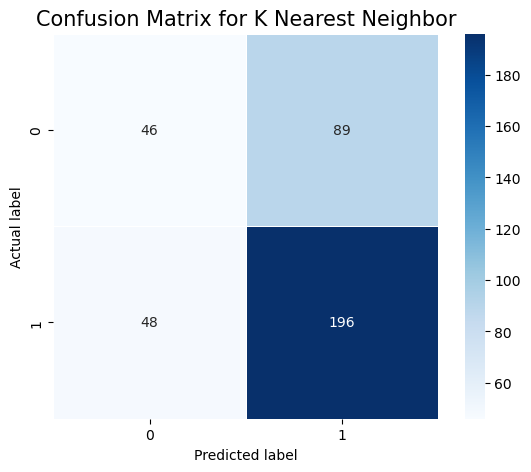

Model: Decision Tree Classifier
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       135
           1       0.69      0.84      0.76       244

    accuracy                           0.65       379
   macro avg       0.61      0.58      0.58       379
weighted avg       0.63      0.65      0.63       379



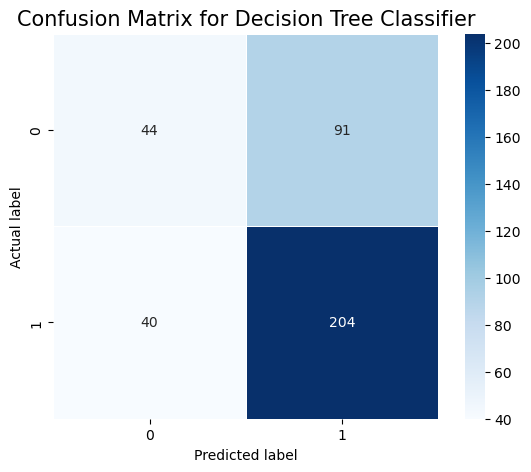

Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.30      0.40       135
           1       0.70      0.90      0.79       244

    accuracy                           0.69       379
   macro avg       0.66      0.60      0.59       379
weighted avg       0.67      0.69      0.65       379



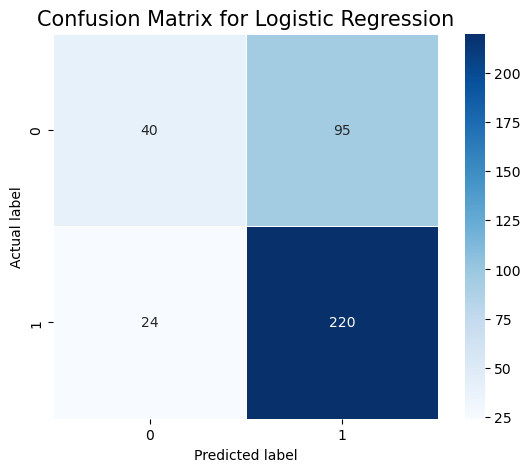

In [62]:
models = [knn_gs, dtc_gs, log_gs]
model_names = ['K Nearest Neighbor', 'Decision Tree Classifier', 'Logistic Regression']

for i, model in enumerate(models):
    print(f"Model: {model_names[i]}")
    
    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test.values, model.predict(X_test.values)))
    
    # Print confusion matrix
    cm = confusion_matrix(y_test.values, model.predict(X_test.values))
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_names[i]}', size = 15)
    plt.show()
